In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"

In [2]:
titanic_data = pd.read_csv('static//train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [6]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
X = pd.get_dummies(X)

In [8]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [9]:
y = titanic_data.Survived

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
X =  X.fillna({'Age': X.Age.median()})

In [12]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [13]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
 class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [20]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [21]:
X = pd.DataFrame(data=[[1, 0],
            [1, 0],
            [1, 0],
            [0, 1],
            [0, 0],
            [0, 0],
            [0, 0],
            [1, 1]],  columns=['1 критерий', '2 критерий'])

In [22]:
y = pd.DataFrame(data=[1, 1, 1, 1, 0, 0, 0, 0], columns=['answer'])

In [23]:
dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [24]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

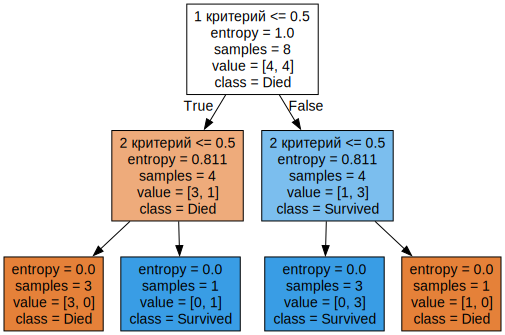

In [25]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
 class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))